In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/sdn-ddos-tcp-syn-dataset.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536950 entries, 0 to 1536949
Data columns (total 28 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   frame number                  1536950 non-null  int64  
 1   eth src                       1536950 non-null  object 
 2   eth dst                       1536950 non-null  object 
 3   eth type                      1536950 non-null  object 
 4   ip hdr_len                    1535294 non-null  float64
 5   ip len                        1535294 non-null  float64
 6   ip id                         1535294 non-null  object 
 7   ip flags                      1535294 non-null  object 
 8   ip ttl                        1535294 non-null  float64
 9   ip proto                      1535294 non-null  float64
 10  ip src                        1535294 non-null  object 
 11  ip dst                        1535294 non-null  object 
 12  tcp src port                

In [5]:
data.head()

,frame number,eth src,eth dst,eth type,ip hdr_len,ip len,ip id,ip flags,ip ttl,ip proto,...,tcp ack,tcp hdr_len,tcp flags,tcp window_size_value,tcp window_size,tcp payload,tcp analysis.bytes_in_flight,tcp analysis.push_bytes_sent,frame len,label
0,1,00:00:00:00:00:01,00:00:00:00:00:19,0x00000800,20.0,67.0,0x00000001,0x00000000,64.0,6.0,...,0.0,20.0,0x00000002,8192.0,8192.0,79:6f:75:20:61:72:65:20:75:6e:64:65:72:20:61:2...,28.0,27.0,81,ddos
1,2,00:00:00:00:00:01,00:00:00:00:00:19,0x00000800,20.0,67.0,0x00000001,0x00000000,64.0,6.0,...,0.0,20.0,0x00000002,8192.0,8192.0,79:6f:75:20:61:72:65:20:75:6e:64:65:72:20:61:2...,28.0,27.0,81,ddos
2,3,00:00:00:00:00:01,00:00:00:00:00:19,0x00000800,20.0,67.0,0x00000001,0x00000000,64.0,6.0,...,0.0,20.0,0x00000002,8192.0,8192.0,79:6f:75:20:61:72:65:20:75:6e:64:65:72:20:61:2...,28.0,27.0,81,ddos
3,4,00:00:00:00:00:01,00:00:00:00:00:19,0x00000800,20.0,67.0,0x00000001,0x00000000,64.0,6.0,...,0.0,20.0,0x00000002,8192.0,8192.0,79:6f:75:20:61:72:65:20:75:6e:64:65:72:20:61:2...,28.0,27.0,81,ddos
4,5,00:00:00:00:00:01,00:00:00:00:00:19,0x00000800,20.0,67.0,0x00000001,0x00000000,64.0,6.0,...,0.0,20.0,0x00000002,8192.0,8192.0,79:6f:75:20:61:72:65:20:75:6e:64:65:72:20:61:2...,28.0,27.0,81,ddos


In [6]:
data.shape

(1536950, 28)

In [7]:
data.isnull().sum()

frame number                          0
eth src                               0
eth dst                               0
eth type                              0
ip hdr_len                         1656
ip len                             1656
ip id                              1656
ip flags                           1656
ip ttl                             1656
ip proto                           1656
ip src                             1656
ip dst                             1656
tcp src port                       1656
tcp dst port                       1656
tcp stream                         1656
tcp len                            1656
tcp seq                            1656
tcp  nxtseq                        1656
tcp ack                            1656
tcp hdr_len                        1656
tcp flags                          1656
tcp window_size_value              1656
tcp window_size                    1656
tcp payload                     1003019
tcp analysis.bytes_in_flight    1003019


In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data['Class'] = label_encoder.fit_transform(data['label'])

print(data[['label', 'Class']])

          label  Class
0          ddos      1
1          ddos      1
2          ddos      1
3          ddos      1
4          ddos      1
...         ...    ...
1536945  benign      0
1536946  benign      0
1536947  benign      0
1536948  benign      0
1536949  benign      0

[1536950 rows x 2 columns]


In [16]:
data.columns

Index(['frame number', 'eth src', 'eth dst', 'eth type', 'ip hdr_len',
       'ip len', 'ip id', 'ip flags', 'ip ttl', 'ip proto', 'ip src', 'ip dst',
       'tcp src port', 'tcp dst port', 'tcp stream', 'tcp len', 'tcp seq',
       'tcp  nxtseq', 'tcp ack', 'tcp hdr_len', 'tcp flags',
       'tcp window_size_value', 'tcp window_size', 'tcp payload',
       'tcp analysis.bytes_in_flight', 'tcp analysis.push_bytes_sent',
       'frame len', 'label', 'Class'],
      dtype='object')

In [17]:
dataNew = data.drop(columns = 'label', axis = 1)

In [18]:
dataNew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536950 entries, 0 to 1536949
Data columns (total 28 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   frame number                  1536950 non-null  int64  
 1   eth src                       1536950 non-null  object 
 2   eth dst                       1536950 non-null  object 
 3   eth type                      1536950 non-null  object 
 4   ip hdr_len                    1535294 non-null  float64
 5   ip len                        1535294 non-null  float64
 6   ip id                         1535294 non-null  object 
 7   ip flags                      1535294 non-null  object 
 8   ip ttl                        1535294 non-null  float64
 9   ip proto                      1535294 non-null  float64
 10  ip src                        1535294 non-null  object 
 11  ip dst                        1535294 non-null  object 
 12  tcp src port                

In [19]:
dataNew.head()

,frame number,eth src,eth dst,eth type,ip hdr_len,ip len,ip id,ip flags,ip ttl,ip proto,...,tcp ack,tcp hdr_len,tcp flags,tcp window_size_value,tcp window_size,tcp payload,tcp analysis.bytes_in_flight,tcp analysis.push_bytes_sent,frame len,Class
0,1,00:00:00:00:00:01,00:00:00:00:00:19,0x00000800,20.0,67.0,0x00000001,0x00000000,64.0,6.0,...,0.0,20.0,0x00000002,8192.0,8192.0,79:6f:75:20:61:72:65:20:75:6e:64:65:72:20:61:2...,28.0,27.0,81,1
1,2,00:00:00:00:00:01,00:00:00:00:00:19,0x00000800,20.0,67.0,0x00000001,0x00000000,64.0,6.0,...,0.0,20.0,0x00000002,8192.0,8192.0,79:6f:75:20:61:72:65:20:75:6e:64:65:72:20:61:2...,28.0,27.0,81,1
2,3,00:00:00:00:00:01,00:00:00:00:00:19,0x00000800,20.0,67.0,0x00000001,0x00000000,64.0,6.0,...,0.0,20.0,0x00000002,8192.0,8192.0,79:6f:75:20:61:72:65:20:75:6e:64:65:72:20:61:2...,28.0,27.0,81,1
3,4,00:00:00:00:00:01,00:00:00:00:00:19,0x00000800,20.0,67.0,0x00000001,0x00000000,64.0,6.0,...,0.0,20.0,0x00000002,8192.0,8192.0,79:6f:75:20:61:72:65:20:75:6e:64:65:72:20:61:2...,28.0,27.0,81,1
4,5,00:00:00:00:00:01,00:00:00:00:00:19,0x00000800,20.0,67.0,0x00000001,0x00000000,64.0,6.0,...,0.0,20.0,0x00000002,8192.0,8192.0,79:6f:75:20:61:72:65:20:75:6e:64:65:72:20:61:2...,28.0,27.0,81,1


In [20]:
dataNew.columns

Index(['frame number', 'eth src', 'eth dst', 'eth type', 'ip hdr_len',
       'ip len', 'ip id', 'ip flags', 'ip ttl', 'ip proto', 'ip src', 'ip dst',
       'tcp src port', 'tcp dst port', 'tcp stream', 'tcp len', 'tcp seq',
       'tcp  nxtseq', 'tcp ack', 'tcp hdr_len', 'tcp flags',
       'tcp window_size_value', 'tcp window_size', 'tcp payload',
       'tcp analysis.bytes_in_flight', 'tcp analysis.push_bytes_sent',
       'frame len', 'Class'],
      dtype='object')

In [22]:
for column in dataNew.columns:
  if dataNew[column].dtype == 'object':
      dataNew.drop(column, axis=1, inplace=True)

In [23]:
for column in dataNew.columns:
    mean_value = dataNew[column].mean()
    dataNew[column].fillna(mean_value, inplace=True)

In [24]:
dataNew.isnull().sum()

frame number                    0
ip hdr_len                      0
ip len                          0
ip ttl                          0
ip proto                        0
tcp src port                    0
tcp dst port                    0
tcp stream                      0
tcp len                         0
tcp seq                         0
tcp  nxtseq                     0
tcp ack                         0
tcp hdr_len                     0
tcp window_size_value           0
tcp window_size                 0
tcp analysis.bytes_in_flight    0
tcp analysis.push_bytes_sent    0
frame len                       0
Class                           0
dtype: int64

In [25]:
dataNew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536950 entries, 0 to 1536949
Data columns (total 19 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   frame number                  1536950 non-null  int64  
 1   ip hdr_len                    1536950 non-null  float64
 2   ip len                        1536950 non-null  float64
 3   ip ttl                        1536950 non-null  float64
 4   ip proto                      1536950 non-null  float64
 5   tcp src port                  1536950 non-null  float64
 6   tcp dst port                  1536950 non-null  float64
 7   tcp stream                    1536950 non-null  float64
 8   tcp len                       1536950 non-null  float64
 9   tcp seq                       1536950 non-null  float64
 10  tcp  nxtseq                   1536950 non-null  float64
 11  tcp ack                       1536950 non-null  float64
 12  tcp hdr_len                 

In [26]:
x = dataNew.drop(columns = 'Class', axis = 1)
y = dataNew['Class']

In [27]:
from sklearn.preprocessing import StandardScaler
label_encoder = LabelEncoder()

for column in dataNew.columns:
  if dataNew[column].dtype == 'string':
    x[column] = pd.to_numeric(x[column], errors='coerce')

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.1, random_state=42)

In [29]:
xTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1383255 entries, 1457320 to 121958
Data columns (total 18 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   frame number                  1383255 non-null  int64  
 1   ip hdr_len                    1383255 non-null  float64
 2   ip len                        1383255 non-null  float64
 3   ip ttl                        1383255 non-null  float64
 4   ip proto                      1383255 non-null  float64
 5   tcp src port                  1383255 non-null  float64
 6   tcp dst port                  1383255 non-null  float64
 7   tcp stream                    1383255 non-null  float64
 8   tcp len                       1383255 non-null  float64
 9   tcp seq                       1383255 non-null  float64
 10  tcp  nxtseq                   1383255 non-null  float64
 11  tcp ack                       1383255 non-null  float64
 12  tcp hdr_len            

In [30]:
print("Eğitim veri seti örnek sayısı:", len(xTrain))
print("Test veri seti örnek sayısı:", len(xTest))

Eğitim veri seti örnek sayısı: 1383255
Test veri seti örnek sayısı: 153695


In [31]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
xTrain, yTrain = smote.fit_resample(xTrain, yTrain)

In [ ]:
xTrain['Class'] == 1

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(x_test, y_test, model):
    y_test_pred = model.predict(x_test)
    y_test_proba = model.predict_proba(x_test)[:, 1]

    y_test_cl_report = classification_report(y_test, y_test_pred, target_names=['No attack', 'Attack'])
    print("_" * 100)
    print("TEST MODEL CLASSIFICATION REPORT")
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print("Test veri seti doğruluğu:", test_accuracy)
    print(y_test_cl_report)

    cm = confusion_matrix(y_test, y_test_pred)
    true_negatives = cm[0, 0]
    false_positives = cm[0, 1]

    specificity = true_negatives / (true_negatives + false_positives)
    print(f"Specificity: {specificity}")

    fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
    roc_auc = roc_auc_score(y_test, y_test_proba)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Saldırı Yok', 'Saldırı Var'],
                yticklabels=['Saldırı Yok', 'Saldırı Var'])
    plt.xlabel('Tahmin Edilen Sınıf')
    plt.ylabel('Gerçek Sınıf')
    plt.title('Test Veri Seti Confusion Matrisi')

    plt.subplot(1, 2, 2)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()

    plt.tight_layout()
    plt.show()

____________________________________________________________________________________________________
TEST MODEL CLASSIFICATION REPORT
Test veri seti doğruluğu: 0.9999869872149387
              precision    recall  f1-score   support

   No attack       1.00      1.00      1.00    142379
      Attack       1.00      1.00      1.00     11316

    accuracy                           1.00    153695
   macro avg       1.00      1.00      1.00    153695
weighted avg       1.00      1.00      1.00    153695

Specificity: 0.9999929764923198


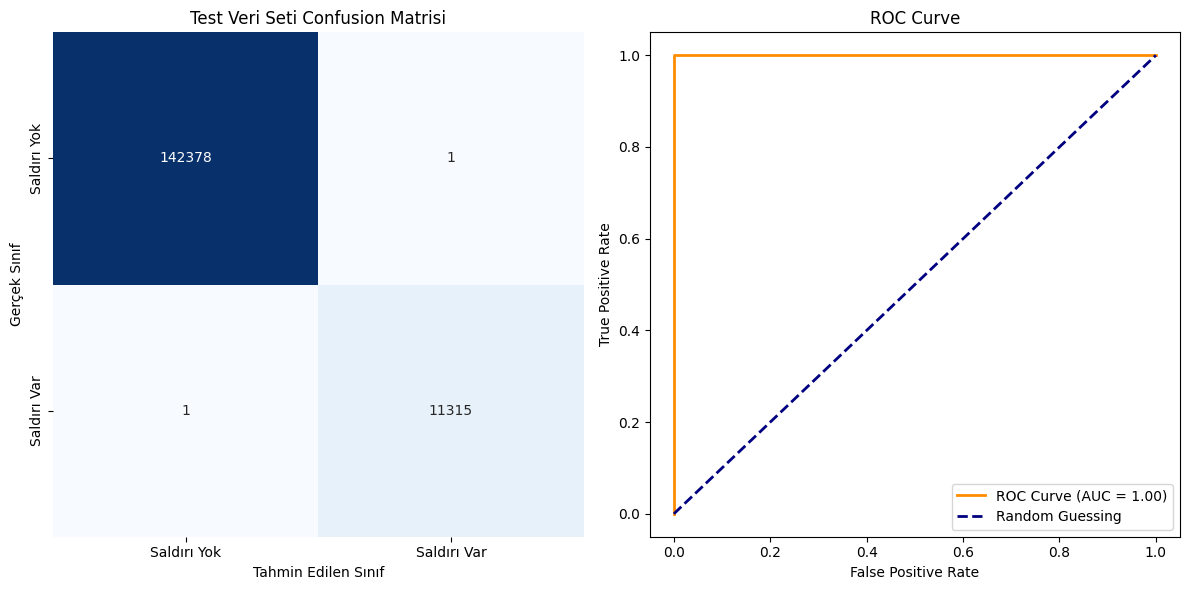

In [33]:
model = RandomForestClassifier()
model.fit(xTrain, yTrain)

yPred = model.predict(xTest)
evaluate_model(xTest, yTest, model)

____________________________________________________________________________________________________
TEST MODEL CLASSIFICATION REPORT
Test veri seti doğruluğu: 0.9997332379062429
              precision    recall  f1-score   support

   No attack       1.00      1.00      1.00    142379
      Attack       1.00      1.00      1.00     11316

    accuracy                           1.00    153695
   macro avg       1.00      1.00      1.00    153695
weighted avg       1.00      1.00      1.00    153695

No attack Specificity: 0.9997120361851116
Attack Specificity: 0.0


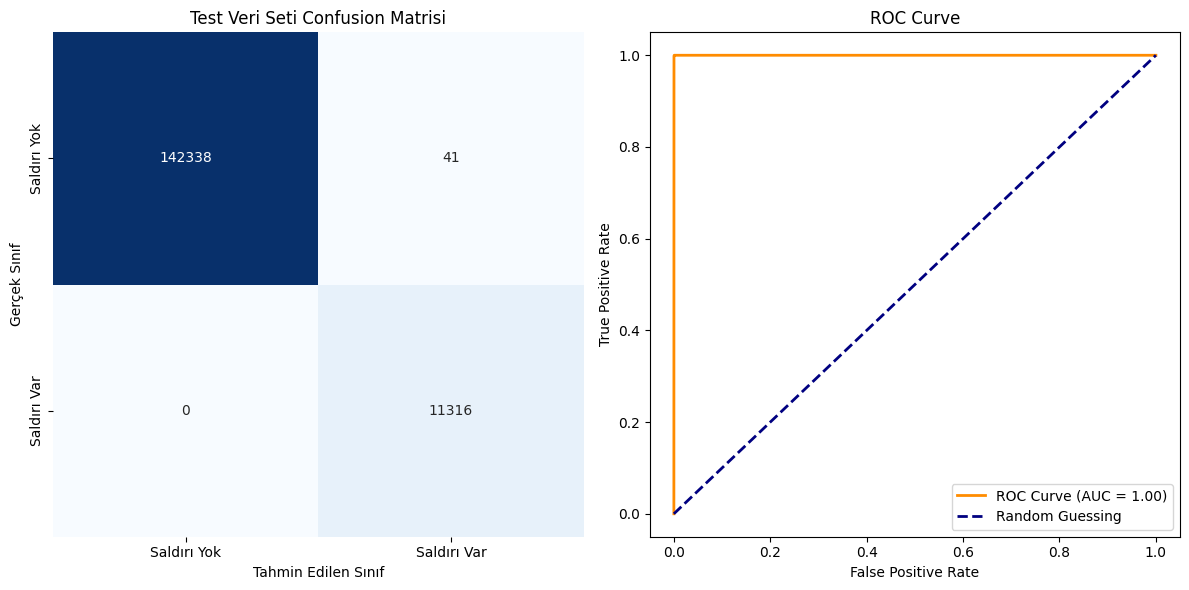

In [45]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(xTrain, yTrain)
evaluate_model(xTest, yTest, model)